In [1]:
#In this DataQuest project we will predict a car's market price
#based on its attributes.
#We will use the K-Nearest Neighbours machine learning algorithms in this
#exercise and compare them using the RMSEs.

In [2]:
#Importing the initial libararies and opening our cars dataset
import pandas as pd
import numpy as np
cars = pd.read_csv(
    "C:/Users/spzvl/OneDrive/Documents/Data/imports-85.data")
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
#Straight away we see that our dataset is missing column names.
#We will have to refer to the dataset's documentation to fix this.
#https://archive.ics.uci.edu/ml/datasets/automobile

In [4]:
cars.columns = ["symboling", "normalized_losses", "make", "fuel_type", 
               "aspiration", "num_of_doors", "body_style", "drive_wheels",
               "engine_location", "wheel_base", "length",  "width", "height",
              "curb_weight", "engine_type", "num_of_cylinders",  "engine_size",
               "fuel_system", "bore", "stroke", "compression_ratio", "horsepower",
               "peak_rpm", "city_mpg", "highway_mpg", "price"]

In [5]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized_losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel_type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num_of_doors       204 non-null    object 
 6   body_style         204 non-null    object 
 7   drive_wheels       204 non-null    object 
 8   engine_location    204 non-null    object 
 9   wheel_base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb_weight        204 non-null    int64  
 14  engine_type        204 non-null    object 
 15  num_of_cylinders   204 non-null    object 
 16  engine_size        204 non

In [7]:
#According to our documentation, the "symboling" column refers to
#assigned risk rating of the car.
# A value of +3 indicates that the auto is risky, -3 indicates that its safe

#The "normalized_losses" column is the average loss per car per year

In [8]:
#Our nearest neighbours algorithm is going to work with continous values only,
#so we should only consider columns with continuous values.

In [9]:
cars_cont = cars[[ "normalized_losses", 
                "wheel_base", "length",  "width", "height",
              "curb_weight",   "engine_size",
                "bore", "stroke", "compression_ratio", "horsepower",
               "peak_rpm", "city_mpg", "highway_mpg", "price"]]
cars_cont.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
4,?,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250


In [10]:
#To prepare our data to be used with KNN, we normalize it 
#(so that all values range from 0 to 1) as well as do some work with the 
#missing values.

In [11]:
cars_cont = cars_cont.replace("?", np.nan) #replacing ? with nan for missing
#values

In [12]:
cars_cont = cars_cont.astype(float) #converting all values to floats

In [13]:
#we use the missingno library to see how many missing values there are
#in our data as well as how they are distributed
import missingno as msno

<AxesSubplot:>

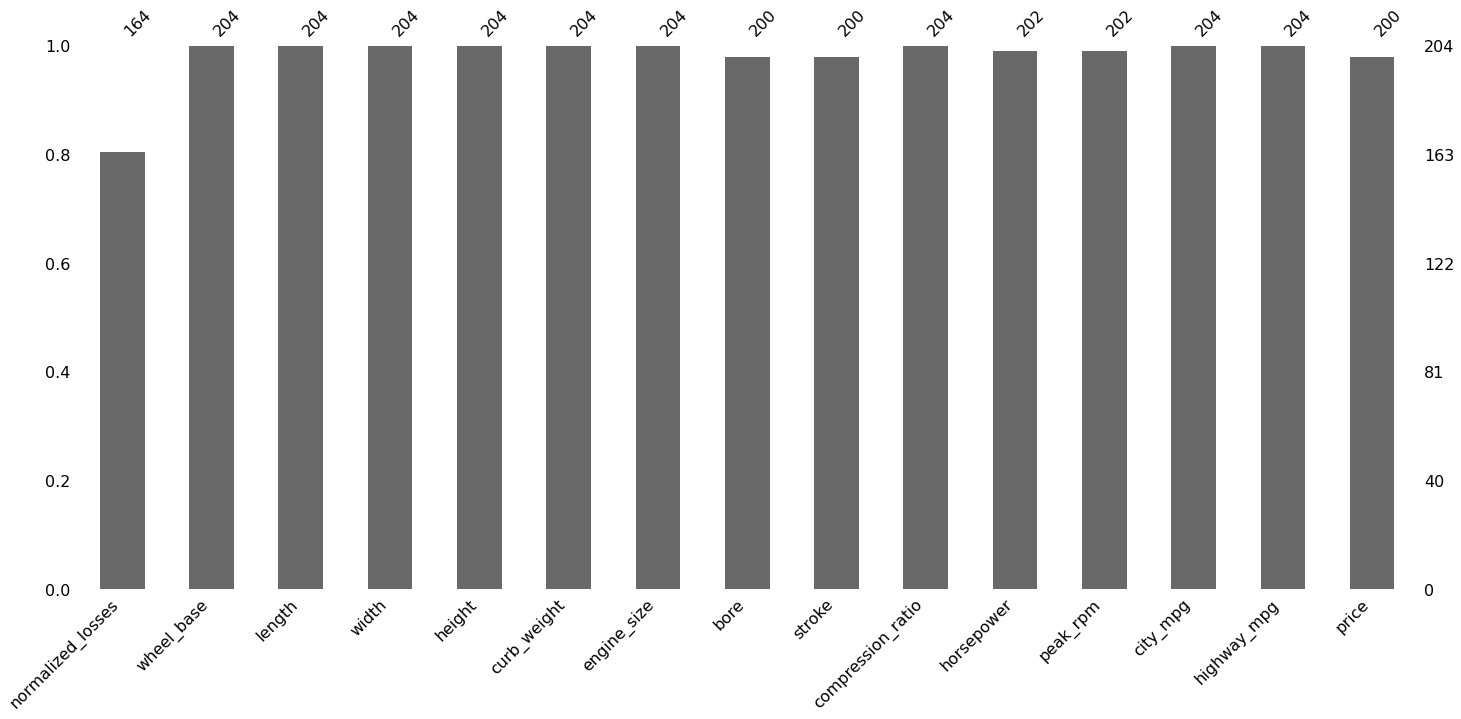

In [14]:
msno.bar(cars_cont, figsize = (24,10)) 

In [15]:
#As we can see, most of our missing values are in the normalized_losses column, about 20% of values are missing there.
#The rest of the columns either have no missing values, 2 missing values (horsepower and peak_rpm), or 4 missing values
#(bore,stroke, price)

#We could drop the normalized_losses column since its missing so many values, and for the rest of the columns, since they are
#only missing a couple of values, we could impute them with the column averages. An alternative approach would be to drop the
#rows with the missing entries, however that would lead to other useful information being disregarded.

In [16]:
#dropping the normalized_losses column
cars_cont.drop(["normalized_losses"], axis = 1, inplace = True)

In [17]:
#imputing the missing values
imputation = ["bore","stroke", "horsepower","peak_rpm","price"]
for col in imputation:
    cars_cont[col].fillna(cars_cont[col].mean(), inplace = True)

<AxesSubplot:>

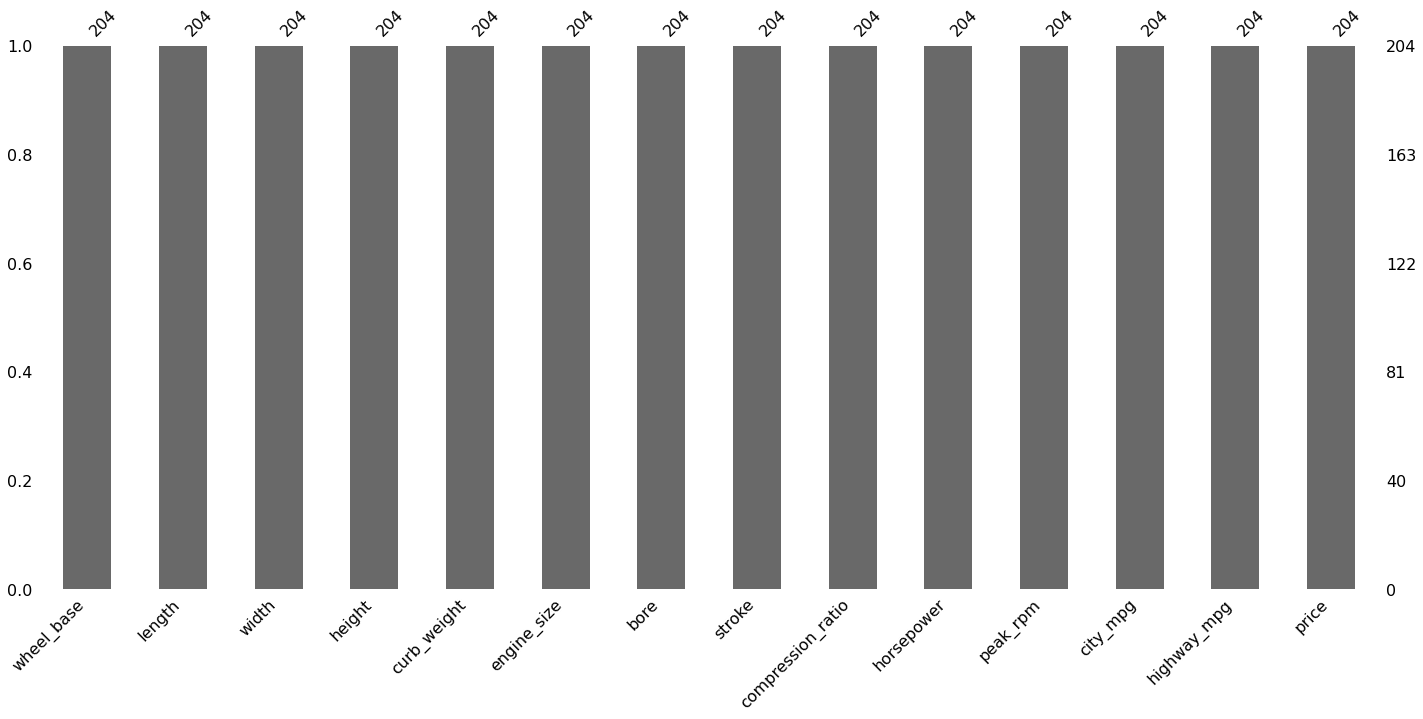

In [18]:
#lets check that all the methods worked correctly
msno.bar(cars_cont, figsize = (24,10)) 

In [19]:
#As we can see, there are no missing values left in the dataset.

In [20]:
#Now we can normalize it

In [21]:
price_c = cars_cont["price"]
cars_cont =(cars_cont-cars_cont.min())/(cars_cont.max()-cars_cont.min())
cars_cont["price"] = price_c

In [22]:
cars_cont.head()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,16500.0
1,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,16500.0
2,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,13950.0
3,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,17450.0
4,0.384840,0.540299,0.500000,0.441667,0.395268,0.283019,0.464286,0.633333,0.09375,0.258333,0.551020,0.166667,0.236842,15250.0


In [26]:
#Now our data is ready to be used with KNN

In [27]:
#We start with some simpler, univariate knn models.
#importing the required parts of scikit library 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [28]:
#The K-Nearest Neighbours algorithm predictis the values of the target column
#by comparing the entries and identifying those that have similar values in the
#training columns (using the formula for eucledian distance) to our test entry.
#Then it picks k nearest neighbours (most similar entries) and computes the average
#value of their target columns values, and assigns that value to our test entry.

In [29]:
#The function below simulates the traning and simple validation of a univariate
#k-nearest neighbors model with the default k value.

#The inputs are: the column used for prediction, the column we are predicting,
#and our data
def knn_train_test(train_col,target_col, data):
    
    #Simple validation - splitting the data into the train and test sets
    #(standard 80/20 proportion)
    train, test = train_test_split(data, test_size = 0.2) 
    #Instantiating the KNeighborsRegressor class
    knn = KNeighborsRegressor()
    np.random.seed(1) #for result reproducibility
    

    #fitting the model on the training set
    knn.fit(train[[train_col]], train[target_col])
    #making predictions on the test set
    predictions = knn.predict(test[[train_col]])
    
    #calculating the mean squared error 
    mse = mean_squared_error(test[target_col], predictions)
    # and finally taking its root (this is our performance evaluation
    # metric)
    rmse = np.sqrt(mse)
    
    #returning the metric
    return rmse
    

In [30]:
#Now we can use the function created above to train and test univariate
#models using different columns from our dataset and comparing the values
#of rmse

In [31]:
rmses = []
train_columns = ["wheel_base", "length",  "width", "height",
              "curb_weight",   "engine_size",
                "bore", "stroke", "compression_ratio", "horsepower",
               "peak_rpm", "city_mpg", "highway_mpg"]
target_column = ["price"]

for col in train_columns:
    rmses.append(knn_train_test(col, target_column, cars_cont))

In [32]:
rmses

[4351.520299423752,
 4231.902815508939,
 3601.850115238353,
 6792.3845539147305,
 4700.349114906388,
 3950.542251564449,
 5986.098033195442,
 6344.46223453847,
 6551.9734521957025,
 3545.6212255250225,
 7197.378775515871,
 4928.017798736665,
 4583.245553277412]

In [33]:
#The 10th column (horsepower) performed the best out of all, for the 
#univariate analysis with the default k value.

In [34]:
#Now we can update the function so that it would also take into account
#custom k values as an additional function parameter

In [35]:
def knn_train_test(train_col,target_col, data, k=5): #set the default number of neighbours as 5
    #the function is very similar to the one above
    train, test = train_test_split(data, test_size = 0.2) 
    knn = KNeighborsRegressor(n_neighbors=k) #now we specify n_neighbours 
    np.random.seed(1)                         #parameter

    knn.fit(train[[train_col]], train[target_col])
    predictions = knn.predict(test[[train_col]])
    
    mse = mean_squared_error(test[target_col], predictions)
    rmse = math.sqrt(mse)

    return rmse
    

In [ ]:
#Now we test the model with different k values for different columns.

In [36]:
#This block of code produces a table of values where each row represents
#a k value (1,3,5,7,9) used in the model, and each column is a training column
#from the dataset.
knn_data = np.zeros((13,5)) #creating an initially empty table
k = [1,3,5,7,9] #all the k values
j=-1 #set column counter
train_columns = ["wheel_base", "length",  "width", "height",
              "curb_weight",   "engine_size",
                "bore", "stroke", "compression_ratio", "horsepower",
               "peak_rpm", "city_mpg", "highway_mpg"]
target_column = ["price"]

for entry in k: #first loop goes through the k values
    i=-1 #resets the row counter
    j+=1 #updates the column counter
    for col in train_columns: #the nested loop goes through the training columns
        i+=1 #updates the row counter
        knn_data[i][j] = knn_train_test(col,
                                              target_column, cars_cont, entry)
        #assigning each rmse to its designated spot in the table
        
knn_t = knn_data.transpose() #transposing the resulting matrix 
#to bring it to the correct format.

In [37]:
#Now turning the 2D array to a dataframe, so the reuslts are a bit more clear
#and are more presentable
knn_dataset = pd.DataFrame(knn_t, index
                           = ["k=1","k=3","k=5","k=7","k=9"],
                          columns = train_columns)
knn_dataset

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
k=1,3637.058867,4415.475499,2722.405562,11310.788801,4932.030847,3782.283405,5817.484435,7216.873463,7952.385187,3339.772291,12782.269769,5825.770356,5920.155585
k=3,4857.123776,4462.054591,3290.600447,7096.629485,4706.044301,4053.184335,5923.169118,6468.302285,6260.596155,3318.092959,7238.949547,5369.025308,5252.828648
k=5,6226.689405,4231.902816,3601.850115,6792.384554,4700.349115,3950.542252,5986.098033,6344.462235,6551.973452,3545.621226,7197.378776,4928.017799,4583.245553
k=7,5763.216296,4367.620805,3978.469212,6772.518144,4487.551826,4151.145171,6252.226760,6746.139054,6197.322310,3671.665041,7182.340948,4616.492292,4644.734419
k=9,5798.389335,4443.273335,4190.429952,7015.201805,3882.120298,4234.353200,6415.014787,7121.455413,6256.449339,3965.013397,7355.733152,4787.480634,4684.661816


In [38]:
#lets vizualize those results
import matplotlib.pyplot as plt
%matplotlib inline

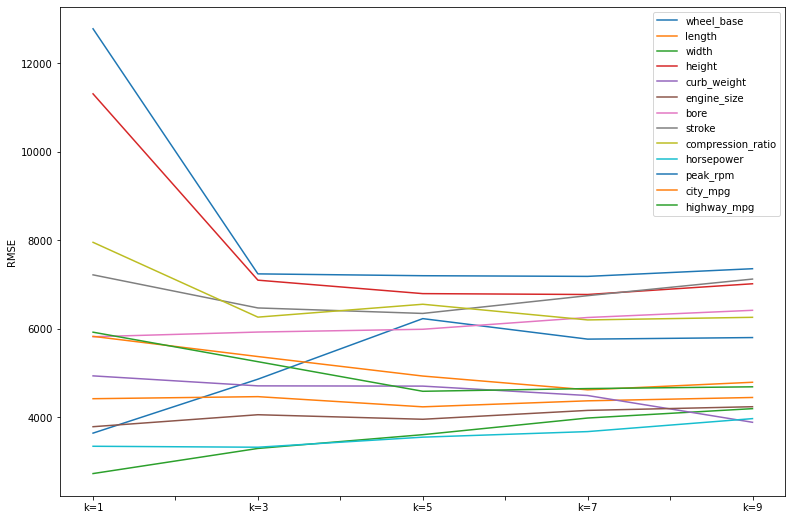

In [39]:
knn_dataset.plot(figsize =(13,9))
plt.legend(loc = "upper right", prop={"size":10})
plt.ylabel("RMSE")
plt.show()

In [40]:
#We can see that all the training columns have their own optimal k 
#parameters.
#The best k parameter for the multivariate model would be the minimum
#point of all the lines.

In [41]:
#Now we update our knn function so to use the multivariate knn model.

In [42]:

def knn_train_test(train_cols,target_col, data, k=5):
    
    #Simple validation - splitting the data into the train and test sets
    #(standard 80/20 proportion)
    train, test = train_test_split(data, test_size = 0.2) 
    #Instantiating the KNeighborsRegressor class
    knn = KNeighborsRegressor(n_neighbors=k)
    np.random.seed(1) #for result reproducibility
    

    #fitting the model on the training set
    knn.fit(train[train_cols], train[target_col])
    #making predictions on the test set
    predictions = knn.predict(test[train_cols])
    
    #calculating the mean squared error 
    mse = mean_squared_error(test[target_col], predictions)
    # and finally taking its root (this is our performance evaluation
    # metric)
    rmse = np.sqrt(mse)
    
    #returning the metric
    return rmse
    

In [43]:
#We can test the model with various columns used, and compare the
#resulting RMSEs

In [44]:
#using all columns from the dataset
knn_train_test(train_columns, target_column, cars_cont)

3397.8806656060647

In [45]:
#Now we test the multivariate model by comparing the RMSEs when 2 best
#performing features are taken into account. (horsepower and width )

In [46]:
train_columns = ["horsepower", "width"]
knn_train_test(train_columns, target_column, cars_cont)

3419.068150627609

In [47]:
#Now we add the 3rd best performing feature (engine size)
train_columns = ["horsepower", "width", "engine_size"]
knn_train_test(train_columns, target_column, cars_cont)

3176.7704790082707

In [48]:
#add another feature (length)
train_columns = ["horsepower", "width", "engine_size", "length"]
knn_train_test(train_columns, target_column, cars_cont)

3666.40756495151

In [49]:
#add highway_mpg column
train_columns = ["horsepower", "width", "engine_size", "length", "highway_mpg"]
knn_train_test(train_columns, target_column, cars_cont)

3806.06721987704

In [50]:
#As we can see, the model performed best when the 3 best performing columns
#(according to the univariate model)
#were used in the multivariate model.


In [51]:
#Now we can do some hyperparameter optimization
#We will take the top 3 best performing multivariate
#models and test them with the k values ranging from 1 to 25.
#We then visualise those results to see which k value is optimal to 
#achieve the smallest RMSE value.

In [64]:
knn_data = np.zeros((3,25)) #creating an initially empty table
j=-1 #set the counter for the columns
train_columns = (["horsepower", "width", "engine_size"],["wheel_base",
                    "length",  "width", "height",
              "curb_weight",   "engine_size",
                "bore", "stroke", "compression_ratio", "horsepower",
               "peak_rpm", "city_mpg", "highway_mpg"],
                 ["horsepower", "width"])
target_column = ["price"]

for k in range(1,26): #first loop goes through the k values
    i=-1 #resets the row counter
    j+=1 #updates the column counter
    for entry in train_columns: 
        i+=1 #updates the row counter
        knn_data[i][j] = knn_train_test(entry,
                                              target_column, cars_cont, k)
        #assigning each rmse to its designated spot in the table
        
knn_t = knn_data.transpose() #transposing the resulting matrix 
#to bring it to the correct format.

knn_dataset_mult = pd.DataFrame(knn_t, 
                          columns = ["3 best features", "all features",
"2 best features"])
knn_dataset_mult.index = np.arange(1, len(knn_dataset_mult)+1)
#rearranging the index of the dataframe so it represents the k values
knn_dataset_mult

,3 best features,all features,2 best features
1,2523.936177,2885.738917,3168.687670
2,2599.920008,2235.830792,3393.639912
3,2599.392287,2493.528163,3318.450249
4,2920.907079,2905.537529,3344.983225
5,3176.770479,3397.880666,3419.068151
6,3360.067037,3775.292669,3537.372697
7,3584.137611,3981.933318,3500.393735
8,3405.474100,4214.619655,3597.302215
9,3512.166113,4047.393880,3785.825227
10,3708.462541,4190.400645,3848.779655


In [ ]:
#Now visualising those results.

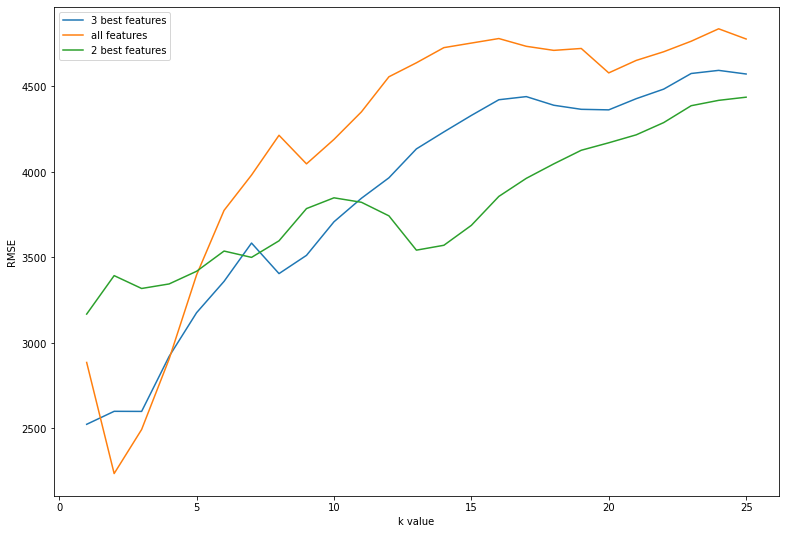

In [67]:
knn_dataset_mult.plot(figsize =(13,9))
plt.legend(loc = "upper left", prop={"size":10})
plt.xlabel("k value")
plt.ylabel("RMSE")
plt.show()

In [ ]:
#As we can see, the lowest RMSE is achieved when we use all features and a k value between 0 and 5.
#Looking this up on our table, we see that the exact optimal value of k is 2. The respective RMSE is 2235.830792.

In [ ]:
#One disadvantage of The KNN algorithm is that we cannot use it with larger
#datasets (note that the one used in this project has only got 204 entries)

#This is because the algorithm is not very efficient, as each time we want to
#make a new prediction, we have to calculate the eucledian distance between
#each entry in the training set and the new observation, and then order them
#according to their distances.

#Other machine learning algorithms rely on representing the model as a 
#mathematical function, that describes the relationships between different
#variables and the target attribute. Once we know that function, making a new
#prediction does not require much effort or computational power. 
#(eg linear regression)